In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load a sample of your data
df = pd.read_csv("CvDatasetFinal_3.csv")


In [ ]:
#!pip install prince
#!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from prince import FAMD
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
random_state = 1234
pd.options.plotting.backend = "plotly"

In [ ]:
# Check for missing or NaN values
print(df.isna().sum())

# Drop the rows that contain missing or NaN values
data = df.dropna()

# Verify that there are no more missing or NaN values
print(df.isna().sum())

Category              0
Name                  0
Email                 0
Phone                 0
Education             0
Skills                0
Experience           52
Experience_Rating     0
dtype: int64
Category              0
Name                  0
Email                 0
Phone                 0
Education             0
Skills                0
Experience           52
Experience_Rating     0
dtype: int64


In [ ]:
df.head()

,Category,Name,Email,Phone,Education,Skills,Experience,Experience_Rating
0,Data Science,Lauren Armstrong,lauren.armstrong@gmail.com,372.165.3732x4577,detail data science assurance associate data s...,skill programming language python panda numpy ...,24 month jquery 24 month python 24 monthscompa...,5
1,Data Science,Kristen Lambert,kristen.lambert@gmail.com,410.381.6487x49465,detail may 2013 may 2017 uitrgpv data scientis...,detail python,le 1 year month statsmodels 12 month aws le 1 ...,5
2,Data Science,Jason Montes,jason.montes@gmail.com,(962)653-8542x1217,detail january 2019 btech electrical electroni...,skill programming matlab python java labview p...,le 1 year month excel le 1 year month machine ...,5
3,Data Science,Molly Jackson,molly.jackson@gmail.com,110.048.2076x99778,detail january 2017 january 2018 pgdm business...,skill python sap hana tableau sap hana sql sap...,6 month retail 6 month retail marketing 6 mont...,5
4,Data Science,Michele Smith,michele.smith@gmail.com,(759)023-5239x309,detail mca ymcaust faridabad haryana data scie...,detail data structure,le 1 year month c le 1 year month data analysi...,5


In [ ]:
def plot_cluster(X, y, title="Cluster plot"):
    fig = px.scatter(X, x='Experience', y='Skills', color=y, width=475, height=475)
    fig.update_layout(autosize=False, coloraxis=dict(showscale=False, colorscale='Portland'), font=dict(size=18),
                      title=dict(text=title, x=0.5, y=0.95, xanchor='center'))
    fig.update_traces(marker=dict(size=15))
    return fig

In [ ]:
X, y = make_blobs(n_samples=50, centers=3, n_features=8, random_state=random_state)

# Concatenate the one-hot encoded categorical data with the numerical data
X = pd.DataFrame(X, columns=[	'Category',	'Name',	'Email','Phone',	'Education',	'Skills',	'Experience','Experience_Rating'])

con_feats = ['Category',	'Name',	'Email',	'Phone',	'Education',	'Skills','Phone',]
cat_feats = [	'Experience_Rating']
scale = StandardScaler()
X[con_feats] = scale.fit_transform(X[con_feats])
X.head()


,Category,Name,Email,Phone,Education,Skills,Experience,Experience_Rating
0,1.103684,1.030278,-0.785298,-1.443477,0.290108,0.700058,-3.454653,1.449909
1,-0.030785,-1.216151,1.589675,1.089114,-1.559420,0.754259,-7.989450,-3.254919
2,-1.065344,0.284954,-0.375884,-0.619659,1.232040,-1.243248,-4.306185,5.607348
3,-1.287906,0.343588,-0.311530,0.554489,0.639342,-0.777054,-4.243752,4.884784
4,-1.134206,0.356268,-0.146799,0.269267,1.061788,-1.738201,-4.653823,7.096413


In [ ]:
import plotly.express as px
fig = plot_cluster(X, y, title="True Data")
fig.show()

In [ ]:
model = KMeans(n_clusters=3, random_state=random_state).fit(X[con_feats])
pred = model.labels_
fig = plot_cluster(X, pred, title="Continuous Only")
fig

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
model = KMeans(n_clusters=3, random_state=random_state).fit(pd.get_dummies(X))
pred = model.labels_
fig = plot_cluster(X, pred, title="Encoded Categorical Data")
fig

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
pred = KPrototypes(n_clusters=3).fit_predict(X, categorical=[2])
fig = plot_cluster(X, pred.astype(float), title="k-prototypes")
fig

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3).fit(X)
pca.transform(X)[:5]

array([[-0.92952153,  2.69848409, -0.56166375],
       [ 6.35828466, -0.49354696,  0.36139492],
       [-4.19152611, -1.47259374, -0.15893978],
       [-3.33757451, -1.49311331,  0.60904576],
       [-5.1688981 , -2.80064435, -0.02335856]])

In [ ]:
def plot_clusterpca(X, y, title="Cluster plot"):
    fig = px.scatter(X, x='PC1', y='PC2', color=y, width=475, height=475)
    fig.update_layout(autosize=False, coloraxis=dict(showscale=False, colorscale='Portland'), font=dict(size=18),
                      title=dict(text=title, x=0.5, y=0.95, xanchor='center'))
    fig.update_traces(marker=dict(size=15))
    return fig 

In [ ]:
model = KMeans(n_clusters=3, random_state=random_state).fit(X_pca)
pred = model.labels_

fig = plot_clusterpca(pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3']), pred, title="PCA + Clustering")
fig.show() 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# Calculate silhouette score
from sklearn.metrics import silhouette_score
score = silhouette_score(X_pca, pred, metric='euclidean', random_state=random_state)
print("Silhouette score:", score)

Silhouette score: 0.4198073366973955


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



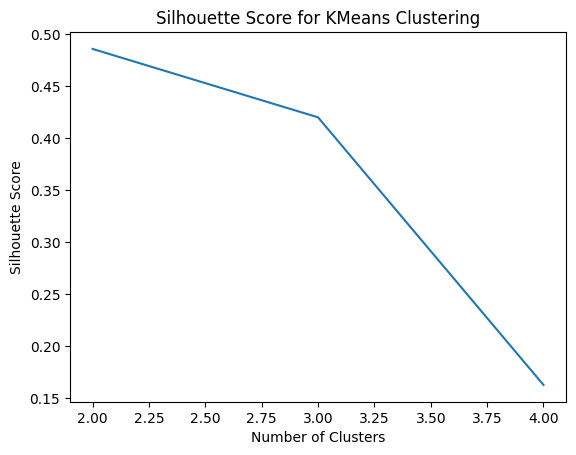

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

silhouette_scores = []

for n_clusters in range(2, len(X_pca)):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state).fit(X_pca)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_pca, labels))

plt.plot(range(2, len(X_pca)), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for KMeans Clustering')
plt.show()

In [ ]:
import plotly.express as px

fig = px.parallel_coordinates(X, color=y, width=800, height=500)
fig.show()


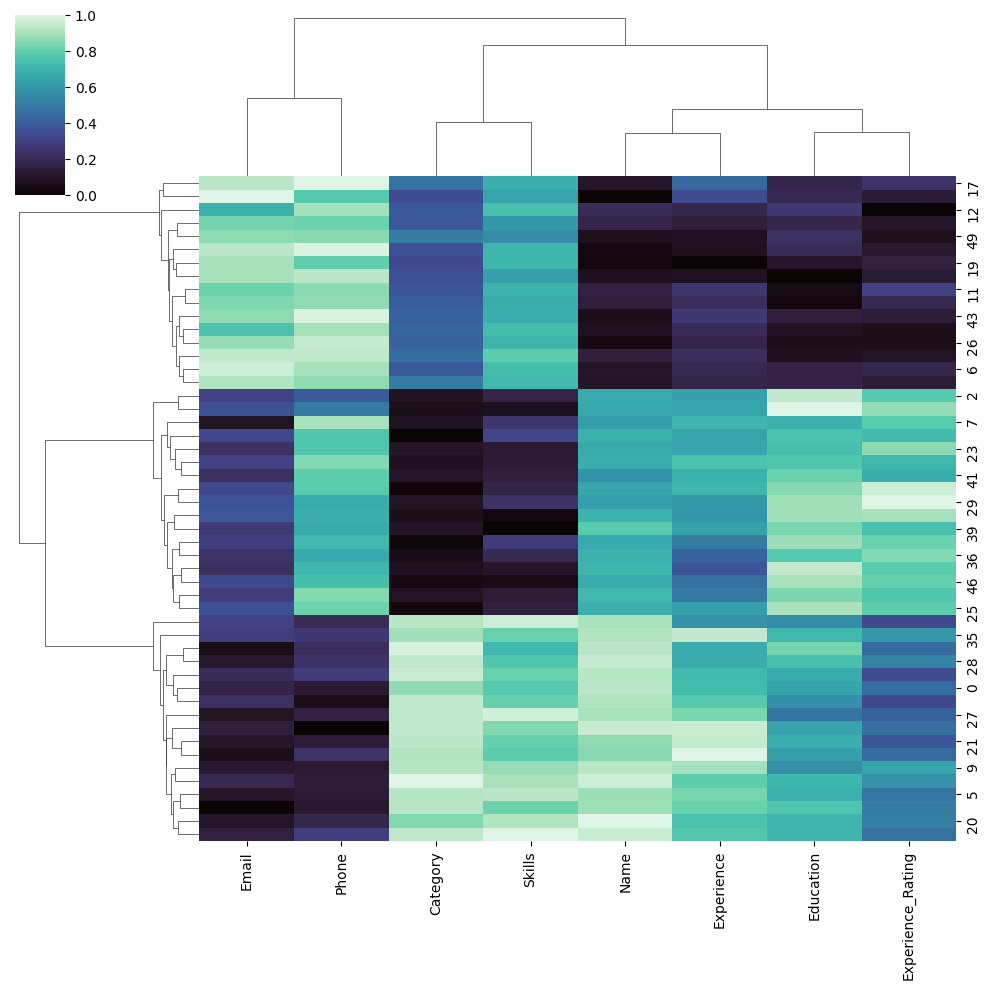

In [ ]:
import seaborn as sns
sns.clustermap(X, cmap="mako", standard_scale=1)

In [ ]:
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])

In [ ]:
import scipy.cluster.hierarchy as sch

Z = sch.linkage(X_pca, method='ward')
fig = px.scatter_3d(X_pca, x='PC1', y='PC2', z='PC3', color=labels)
fig.update_traces(marker=dict(size=5, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(title='PCA + Hierarchical Clustering')
fig.show()